In [ ]:
import pandas as pd
import numpy as  np
import matplotlib as plt

%tensorflow_version 2.x

df_encoding = "utf-8"

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/deep-learning/cleaned-dataset.csv", encoding=df_encoding)
df = df.sample(frac=1, replace=True, random_state=1)

# keep max length of words and sentences
words_length = max(len(w) for w in df['tweets'])
sentence_length = max(len(w.split(' ')) for w in df['tweets'])

print("max chars in a tweet:", words_length)
print("max num of words in a tweet:", sentence_length)

df.head()

Mounted at /content/drive
max chars in a tweet: 140
max num of words in a tweet: 40


,sentiment,tweets
128037,1,well that would be interesting but i thought y...
491755,0,i feel the same too
470924,0,hey joe wish i could watch it man but it aint ...
491263,0,shed be lke quotyou just got a phooonequot hah...
836489,1,thanks for the feedback


Config tensorflow with TPU

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os


use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

# TPU address
tpu_address = TF_MASTER

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.78.6.194:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.78.6.194:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Define usefull functions


In [ ]:
def create_subsets(dataset, features, labels, num_classes, train_size=0, valid_size=0, test_size=0):
    
    subsets = {}
    
    # Define a size for your train set 
    train_n = int(train_size * len(dataset))
    valid_n = int(valid_size * len(dataset))
    test_n = int(test_size * len(dataset))
    
    # train_test split
    subsets['X_train'] = dataset[features][:train_n]
    subsets['X_valid'] = dataset[features][train_n:train_n+valid_n]
    subsets['X_test'] = dataset[features][train_n+valid_n:train_n+valid_n+test_n]

    subsets['Y_train'] = dataset[labels][:train_n]
    subsets['Y_valid'] = dataset[labels][train_n:train_n+valid_n]
    subsets['Y_test'] = dataset[labels][train_n+valid_n:train_n+valid_n+test_n]
    
    return subsets

def words_to_sequences(max_sentence_length, subsets):
    seq_subsets = {}
    vocab_size = 0
    global tokenizer 
    tokenizer = Tokenizer()
    for key, value in subsets.items():
        if key.startswith('X'):
            # create vocabulary based on word frequency
            #   -word_counts: Dictionary of words and their corresponding counts.
            #   -word_docs: Dictionary of words and their corresponding documents appeared in.
            #   -word_index: Dictionary of words and their uniquely assigned integers.
            #   -document_count: Count of the total number of documents that were used to fit the Tokenizer.
            if key.startswith('X_train'):
                tokenizer.fit_on_texts(list(value))
            
            # texts_to_sequences assigns integers to words for each document
            sequence = tokenizer.texts_to_sequences(value)
            # padding to prepare sequences of same length
            sequence = pad_sequences(sequence, maxlen = max_sentence_length)
            seq_subsets[key] = sequence
            
            if len(tokenizer.word_index) > vocab_size:
                vocab_size = len(tokenizer.word_index)

    return seq_subsets, vocab_size+1;

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import defaultdict

features = 'tweets'
labels = 'sentiment'

#create appropriate subsets
initial_subsets = create_subsets(dataset=df, features=features, labels=labels, 
                   train_size=0.6, valid_size=0.2, test_size=0.2, num_classes=2)

# convert features (text) to sequences
seq_subsets, vocab_size = words_to_sequences(sentence_length, subsets=initial_subsets)

## Load Glove

In [ ]:
EMBED_DIM = 300

glove_dict = dict()
f = open('/content/drive/My Drive/deep-learning/glove.840B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = ''.join(values[:-300])
    if word in tokenizer.word_index:
      coefs = np.asarray(values[-300:], dtype='float32')
      glove_dict[word] = coefs
f.close()

In [ ]:
print('Loaded %s word vectors.' % len(glove_dict))

Loaded 82908 word vectors.


## Create Embedding Matrix 

In [ ]:
# weight matrix of words in tweets
embedding_matrix = np.zeros((vocab_size, EMBED_DIM))

for word, i in tokenizer.word_index.items():
    embedding_vector = glove_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    


## Model training and evalutation 

### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM, Conv1D, MaxPooling1D, Bidirectional
from keras.optimizers import Adam

def get_model():
  model = Sequential()

  model.add(Embedding(input_dim=vocab_size, output_dim=EMBED_DIM, weights=[embedding_matrix], input_length=sentence_length, trainable=False))
  model.add(Bidirectional(LSTM(128, return_sequences=True)))
  model.add(Dropout(0.3))
  model.add(Bidirectional(LSTM(128, return_sequences=True)))
  model.add(Dropout(0.3))
  model.add(LSTM(128))
  model.add(Dense(64))
  model.add(Dense(1, activation='sigmoid'))

  return model


with strategy.scope():
  model = get_model()
  model.compile(loss = 'binary_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 300)           61108800  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 40, 256)           439296    
_________________________________________________________________
dropout_4 (Dropout)          (None, 40, 256)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40, 256)           394240    
_________________________________________________________________
dropout_5 (Dropout)          (None, 40, 256)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
import keras
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

BATCH_SIZE=500

callbacks = [ #ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=0.001, verbose=1),
              EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)]


history = model.fit(seq_subsets['X_train'], initial_subsets['Y_train'], 
                    validation_data=(seq_subsets['X_valid'],initial_subsets['Y_valid']), shuffle=True, 
                    epochs=50, batch_size=BATCH_SIZE, callbacks=callbacks)


Epoch 1/50
1916/1916 [==============================] - 126s 49ms/step - loss: 0.4634 - accuracy: 0.7780 - val_loss: 0.3954 - val_accuracy: 0.8204
Epoch 2/50
1916/1916 [==============================] - 84s 44ms/step - loss: 0.3841 - accuracy: 0.8266 - val_loss: 0.3638 - val_accuracy: 0.8382
Epoch 3/50
1916/1916 [==============================] - 85s 44ms/step - loss: 0.3487 - accuracy: 0.8466 - val_loss: 0.3444 - val_accuracy: 0.8495
Epoch 4/50
1916/1916 [==============================] - 86s 45ms/step - loss: 0.3154 - accuracy: 0.8647 - val_loss: 0.3296 - val_accuracy: 0.8597
Epoch 5/50
1916/1916 [==============================] - 85s 44ms/step - loss: 0.2830 - accuracy: 0.8819 - val_loss: 0.3185 - val_accuracy: 0.8689
Epoch 6/50
1916/1916 [==============================] - 85s 44ms/step - loss: 0.2516 - accuracy: 0.8979 - val_loss: 0.3101 - val_accuracy: 0.8767
Epoch 7/50
1916/1916 [==============================] - 85s 44ms/step - loss: 0.2252 - accuracy: 0.9107 - val_loss: 0.2998 

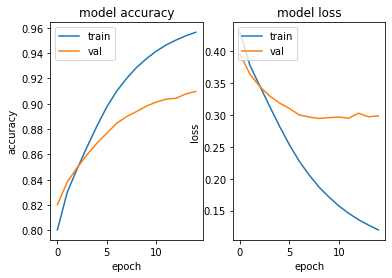

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
model.evaluate(seq_subsets['X_test'], initial_subsets['Y_test'], batch_size=BATCH_SIZE)

639/639 [==============================] - 15s 22ms/step - loss: 0.2962 - accuracy: 0.8936


[0.2961875796318054, 0.8936060070991516]

In [ ]:
y_pred = (model.predict(seq_subsets['X_test']) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(initial_subsets['Y_test'], y_pred))
print(classification_report(initial_subsets['Y_test'], y_pred, labels=[0, 1], target_names=['Negative', 'Positive']))

[[143387  16208]
 [ 17762 141928]]
              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89    159595
    Positive       0.90      0.89      0.89    159690

    accuracy                           0.89    319285
   macro avg       0.89      0.89      0.89    319285
weighted avg       0.89      0.89      0.89    319285



### CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM, Conv1D, MaxPooling1D, Bidirectional, Flatten
from keras.optimizers import Adam
import keras
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

def get_model_cnn():
  model_cnn = Sequential()

  model_cnn.add(Embedding(input_dim=vocab_size, output_dim=EMBED_DIM, weights=[embedding_matrix], input_length=sentence_length, trainable=False))
  model_cnn.add(Conv1D(filters=32, kernel_size=32, activation='relu'))
  model_cnn.add(MaxPooling1D(pool_size=2, padding='same'))
  model_cnn.add(Flatten())
  model_cnn.add(Dense(10, activation='relu'))
  model_cnn.add(Dense(1, activation='sigmoid'))

  return model_cnn


with strategy.scope():
  model_cnn = get_model_cnn()
  optimizer = Adam()#(learning_rate=0.01)
  model_cnn.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])


model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 40, 300)           61108800  
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 9, 32)             307232    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 32)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1610      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 61,417,653
Trainable params: 308,853
Non-trainable params: 61,108,800
____________________________________

In [ ]:
BATCH_SIZE=500

callbacks = [ #ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=0.001, verbose=1),
              EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)]


history_cnn = model_cnn.fit(seq_subsets['X_train'], initial_subsets['Y_train'], 
                    validation_data=(seq_subsets['X_valid'], initial_subsets['Y_valid']), shuffle=True, 
                    epochs=50, batch_size=BATCH_SIZE, callbacks=callbacks)

Epoch 1/50
1916/1916 [==============================] - 54s 26ms/step - loss: 0.4938 - accuracy: 0.7569 - val_loss: 0.4241 - val_accuracy: 0.8040
Epoch 2/50
1916/1916 [==============================] - 46s 24ms/step - loss: 0.4042 - accuracy: 0.8163 - val_loss: 0.4038 - val_accuracy: 0.8177
Epoch 3/50
1916/1916 [==============================] - 47s 24ms/step - loss: 0.3627 - accuracy: 0.8407 - val_loss: 0.3909 - val_accuracy: 0.8278
Epoch 4/50
1916/1916 [==============================] - 46s 24ms/step - loss: 0.3318 - accuracy: 0.8567 - val_loss: 0.3842 - val_accuracy: 0.8340
Epoch 5/50
1916/1916 [==============================] - 47s 24ms/step - loss: 0.3077 - accuracy: 0.8690 - val_loss: 0.3821 - val_accuracy: 0.8387
Epoch 6/50
1916/1916 [==============================] - 47s 24ms/step - loss: 0.2890 - accuracy: 0.8790 - val_loss: 0.3814 - val_accuracy: 0.8440
Epoch 7/50
1916/1916 [==============================] - 46s 24ms/step - loss: 0.2734 - accuracy: 0.8865 - val_loss: 0.3787 -

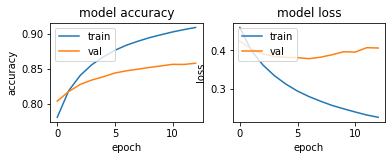

In [ ]:
plt.subplot(2, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
model_cnn.evaluate(seq_subsets['X_test'], initial_subsets['Y_test'], batch_size=BATCH_SIZE)

639/639 [==============================] - 13s 19ms/step - loss: 0.3805 - accuracy: 0.8462


[0.3804706037044525, 0.84621262550354]

## Model save to drive

In [ ]:
# save model and architecture to single file
model.save("/content/drive/My Drive/deep-learning/rnn_lstm.h5")
model_cnn.save("/content/drive/My Drive/deep-learning/cnn_embd.h5")
print("Saved models to disk")

Saved models to disk


##Multinomial Naive Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report

score='f1_macro'

pipe = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                     ('tfidf', TfidfTransformer(norm='l1',use_idf=False)),
                     ('clf', MultinomialNB(alpha=0.1))])

pipe.fit(initial_subsets['X_train'], initial_subsets['Y_train'])

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l1', smooth_idf=True,
                                  sublinear_tf=False, use_idf=False)),
                ('clf',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
print(classification_report(initial_subsets['Y_test'], pipe.predict(initial_subsets['X_test']), digits=4))

              precision    recall  f1-score   support

           0     0.8440    0.8846    0.8638    159595
           1     0.8788    0.8366    0.8572    159690

    accuracy                         0.8606    319285
   macro avg     0.8614    0.8606    0.8605    319285
weighted avg     0.8614    0.8606    0.8605    319285



In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.
